In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.options.display.max_columns = None


<ipython-input-2-214c2f57db01>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)[:-5]

In [4]:
cost_of_living_df

,GeoFips,GeoName,LineCode,Description,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,00000,United States,1.0,RPPs: All items,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,00000,United States,2.0,RPPs: Goods,99.3,99.2,99.0,99.0,99.0,99.0,99.0,99.0,99.0,98.9,98.9,98.8
2,00000,United States,3.0,RPPs: Services: Rents,101.1,101.2,102.0,101.9,101.8,101.8,101.7,101.7,101.8,101.8,102.0,102.0
3,00000,United States,4.0,RPPs: Services: Other,100.3,100.3,100.1,100.1,100.1,100.1,100.1,100.1,100.1,100.1,100.0,100.0
4,00999,United States (Nonmetropolitan Portion) 1/,1.0,RPPs: All items,86.6,86.8,87.3,87.5,87.8,88.2,88.1,88.0,87.9,87.9,87.3,86.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,49700,"Yuba City, CA (Metropolitan Statistical Area)",4.0,RPPs: Services: Other,97.6,99.3,100.2,100.8,101.3,102.8,102.0,101.5,101.6,101.2,101.6,102.2
1540,49740,"Yuma, AZ (Metropolitan Statistical Area)",1.0,RPPs: All items,93.3,94.8,94.2,95.1,93.9,94.0,92.9,92.1,90.1,88.8,88.3,87.8
1541,49740,"Yuma, AZ (Metropolitan Statistical Area)",2.0,RPPs: Goods,95.8,96.6,97.1,97.6,96.9,96.4,95.5,95.2,93.6,93.0,92.9,93.0
1542,49740,"Yuma, AZ (Metropolitan Statistical Area)",3.0,RPPs: Services: Rents,81.8,84.5,79.9,81.6,77.5,77.1,76.2,74.6,72.5,71.0,70.2,69.3


In [5]:
university_rankings = pd.read_pickle(DATA_DIR/ 'university_ranking_statistical_area.pickle')

In [6]:
len(university_rankings)

6442

In [7]:
university_rankings = university_rankings[university_rankings.CBSA.isnull() == False]

In [8]:
university_rankings[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH"
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA"
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH"


In [9]:
statistical_areas = np.array([i.split(' (')[0] for i in cost_of_living_df.GeoName.values])

### add RPP values to each university

In [10]:
RPP_list = [
    ['RPP_all','RPPs: All items'],
    ['RPP_goods','  RPPs: Goods'],
    ['RPP_rents','  RPPs: Services: Rents'],
    ['RPP_other','  RPPs: Services: Other'],
]

In [11]:
RPP_list[0]

['RPP_all', 'RPPs: All items']

In [12]:
for label, col in tqdm(RPP_list):
    RPP = []
    for idx, row in tqdm(university_rankings.iterrows(), total=len(university_rankings)):
        matching_stat_area = cost_of_living_df[cost_of_living_df.GeoFips.astype(int) == row.CBSA]
        if len(matching_stat_area) == 0:
            print('RPP not found: {} | {}'.format(row.INSTNM, row.CBSA))
            COL_value = np.nan
        else:
            COL_value = matching_stat_area[matching_stat_area.Description == col]['2019'].values[0]
        RPP.append(COL_value)
    university_rankings[label] = RPP

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/6442 [00:00<?, ?it/s]

RPP not found: Dartmouth College | 30100
RPP not found: Washington State University | 39420
RPP not found: Oklahoma State University-Main Campus | 44660
RPP not found: Ohio University-Main Campus | 11900
RPP not found: University of Wyoming | 29660
RPP not found: University of Mississippi | 37060
RPP not found: University of Mississippi | 37060
RPP not found: Montana State University | 14580
RPP not found: Mississippi State University | 44260
RPP not found: Louisiana Tech University | 40820
RPP not found: University of Idaho | 34140
RPP not found: Missouri University of Science and Technology | 40620
RPP not found: Michigan Technological University | 26340
RPP not found: Clarkson University | 36300
RPP not found: Central Alabama Community College | 10760
RPP not found: Enterprise State Community College | 21460
RPP not found: New Beginning College of Cosmetology | 10700
RPP not found: George C Wallace Community College-Dothan | 37120
RPP not found: George C Wallace State Community Coll

RPP not found: Central Christian College of Kansas | 32700
RPP not found: Cloud County Community College | -2
RPP not found: Coffeyville Community College | 17700
RPP not found: Colby Community College | -2
RPP not found: Cowley County Community College | 49060
RPP not found: Dodge City Community College | 19980
RPP not found: Emporia State University | 21380
RPP not found: Flint Hills Technical College | 21380
RPP not found: Fort Hays State University | 25700
RPP not found: Barclay College | -2
RPP not found: Fort Scott Community College | -2
RPP not found: Garden City Community College | 23780
RPP not found: Hays Academy of Hair Design | 25700
RPP not found: Hutchinson Community College | 26740
RPP not found: Independence Community College | 17700
RPP not found: Kansas Wesleyan University | 41460
RPP not found: Labette Community College | 37660
RPP not found: McPherson College | 32700
RPP not found: Neosho County Community College | -2
RPP not found: North Central Kansas Technical Co

RPP not found: Olympian Academy of Cosmetology | 10460
RPP not found: Navajo Technical University | 23700
RPP not found: Clovis Community College | 17580
RPP not found: Eastern New Mexico University-Main Campus | 38780
RPP not found: Eastern New Mexico University-Roswell Campus | 40740
RPP not found: New Mexico Highlands University | 29780
RPP not found: New Mexico Junior College | 26020
RPP not found: New Mexico Military Institute | 40740
RPP not found: University of New Mexico-Gallup Campus | 23700
RPP not found: New Mexico Institute of Mining and Technology | -2
RPP not found: University of New Mexico-Los Alamos Campus | 31060
RPP not found: New Mexico State University-Alamogordo | 10460
RPP not found: New Mexico State University-Carlsbad | 16100
RPP not found: New Mexico State University-Grants | 24380
RPP not found: Northern New Mexico College | 21580
RPP not found: University of the Southwest | 26020
RPP not found: University of New Mexico-Taos Campus | 45340
RPP not found: Mesal

RPP not found: Seminole State College | -2
RPP not found: Southern School of Beauty Inc | 20460
RPP not found: Southeastern Oklahoma State University | 20460
RPP not found: Southwestern Oklahoma State University | 48220
RPP not found: Western Oklahoma State College | 11060
RPP not found: Formations Institute of Cosmetology & Barbering | 49260
RPP not found: High Plains Technology Center | 49260
RPP not found: Blue Mountain Community College | 25840
RPP not found: Clatsop Community College | 11820
RPP not found: Eastern Oregon University | 29260
RPP not found: Oregon Institute of Technology | 28900
RPP not found: Southwestern Oregon Community College | 18300
RPP not found: Treasure Valley Community College | 36620
RPP not found: Umpqua Community College | 40700
RPP not found: College of Cosmetology | 28900
RPP not found: Allegheny College | 32740
RPP not found: Bucknell University | 30260
RPP not found: Clarion University of Pennsylvania | -2
RPP not found: Empire Beauty School-Shamokin

RPP not found: Salem University | 17220
RPP not found: Southern West Virginia Community and Technical College | 34350
RPP not found: Fred W Eberle Technical Center | -2
RPP not found: West Virginia School of Osteopathic Medicine | -2
RPP not found: West Virginia Wesleyan College | -2
RPP not found: Lakeshore Technical College | 31820
RPP not found: Maranatha Baptist University | 48020
RPP not found: Mid-State Technical College | 49220
RPP not found: Nicolet Area Technical College | -2
RPP not found: Northland College | -2
RPP not found: Holy Family College | 31820
RPP not found: Southwest Wisconsin Technical College | 38420
RPP not found: University of Wisconsin-Whitewater | 48580
RPP not found: Wisconsin Indianhead Technical College | -2
RPP not found: University of Wisconsin-Stout | 32860
RPP not found: University of Wisconsin-Platteville | 38420
RPP not found: University of Wisconsin-Stevens Point | 44620
RPP not found: Central Wyoming College | 40180
RPP not found: Eastern Wyoming 

RPP not found: Faust Institute of Cosmetology-Spirit Lake | 44020
RPP not found: Southwest Collegiate Institute for the Deaf | 13700
RPP not found: Hawaii Community College | 25900
RPP not found: Buckeye Joint Vocational School | 35420
RPP not found: Sandusky Career Center | 41780
RPP not found: Erie 2 Chautauqua Cattaraugus BOCES-Practical Nursing Program | 27460
RPP not found: Eastern New Mexico University Ruidoso Branch Community College | 40760
RPP not found: Mid-EastCTC-Adult Education | 49780
RPP not found: Frontier Community College | -2
RPP not found: Lincoln Trail College | -2
RPP not found: Wabash Valley College | -2
RPP not found: Inter American University of Puerto Rico-School of Optometry | 41980
RPP not found: Emma's Beauty Academy-Juana Diaz | 38660
RPP not found: Columbia Central University-Yauco | 49500
RPP not found: Delaware Chenango Madison Otsego BOCES-Practical Nursing Program | -2
RPP not found: Central Susquehanna Intermediate Unit LPN Career | 30260
RPP not fou

RPP not found: Northeast Technology Center | -2
RPP not found: Omega Graduate School | 19420
RPP not found: Jung Tao School of Classical Chinese Medicine | 14380
RPP not found: Keweenaw Bay Ojibwa Community College | -2
RPP not found: Mauna Loa Helicopters | 25900
RPP not found: American Technical Institute | 41980
RPP not found: Capilo School of Hair Design | 12300
RPP not found: Advanced College of Cosmetology | 13180
RPP not found: Elite School of Cosmetology | 35940
RPP not found: Dewey University-Manati | 41980
RPP not found: Panache Academy of Beauty | 12660
RPP not found: Hays Academy of Hair Design | 41460
RPP not found: Academy of Salon Professionals | 42740
RPP not found: Future Generations University | -2
RPP not found: Ukiah Adult School | 46380
RPP not found: Bonnie Joseph Academy of Cosmetology & Barbering | 25720
RPP not found: University of North Georgia | -2
RPP not found: South Georgia State College | 20060
RPP not found: Universidad Ana G. Mendez-Online Campus | 4198

  0%|          | 0/6442 [00:00<?, ?it/s]

RPP not found: Dartmouth College | 30100
RPP not found: Washington State University | 39420
RPP not found: Oklahoma State University-Main Campus | 44660
RPP not found: Ohio University-Main Campus | 11900
RPP not found: University of Wyoming | 29660
RPP not found: University of Mississippi | 37060
RPP not found: University of Mississippi | 37060
RPP not found: Montana State University | 14580
RPP not found: Mississippi State University | 44260
RPP not found: Louisiana Tech University | 40820
RPP not found: University of Idaho | 34140
RPP not found: Missouri University of Science and Technology | 40620
RPP not found: Michigan Technological University | 26340
RPP not found: Clarkson University | 36300
RPP not found: Central Alabama Community College | 10760
RPP not found: Enterprise State Community College | 21460
RPP not found: New Beginning College of Cosmetology | 10700
RPP not found: George C Wallace Community College-Dothan | 37120
RPP not found: George C Wallace State Community Coll

RPP not found: Barton County Community College | 24460
RPP not found: Benedictine College | 11860
RPP not found: Bethany College | 32700
RPP not found: Central Christian College of Kansas | 32700
RPP not found: Cloud County Community College | -2
RPP not found: Coffeyville Community College | 17700
RPP not found: Colby Community College | -2
RPP not found: Cowley County Community College | 49060
RPP not found: Dodge City Community College | 19980
RPP not found: Emporia State University | 21380
RPP not found: Flint Hills Technical College | 21380
RPP not found: Fort Hays State University | 25700
RPP not found: Barclay College | -2
RPP not found: Fort Scott Community College | -2
RPP not found: Garden City Community College | 23780
RPP not found: Hays Academy of Hair Design | 25700
RPP not found: Hutchinson Community College | 26740
RPP not found: Independence Community College | 17700
RPP not found: Kansas Wesleyan University | 41460
RPP not found: Labette Community College | 37660
RPP 

RPP not found: Olympian Academy of Cosmetology | 10460
RPP not found: Navajo Technical University | 23700
RPP not found: Clovis Community College | 17580
RPP not found: Eastern New Mexico University-Main Campus | 38780
RPP not found: Eastern New Mexico University-Roswell Campus | 40740
RPP not found: New Mexico Highlands University | 29780
RPP not found: New Mexico Junior College | 26020
RPP not found: New Mexico Military Institute | 40740
RPP not found: University of New Mexico-Gallup Campus | 23700
RPP not found: New Mexico Institute of Mining and Technology | -2
RPP not found: University of New Mexico-Los Alamos Campus | 31060
RPP not found: New Mexico State University-Alamogordo | 10460
RPP not found: New Mexico State University-Carlsbad | 16100
RPP not found: New Mexico State University-Grants | 24380
RPP not found: Northern New Mexico College | 21580
RPP not found: University of the Southwest | 26020
RPP not found: University of New Mexico-Taos Campus | 45340
RPP not found: Mesal

RPP not found: Indiana University of Pennsylvania-Main Campus | 26860
RPP not found: UPMC Jameson School of Nursing | 35260
RPP not found: Juniata College | 26500
RPP not found: Lock Haven University | 30820
RPP not found: Mansfield University of Pennsylvania | -2
RPP not found: New Castle School of Trades | 35260
RPP not found: Pennsylvania State University-Penn State DuBois | 20180
RPP not found: Pennsylvania State University-Penn State Schuylkill | 39060
RPP not found: University of Pittsburgh-Bradford | 14620
RPP not found: University of Pittsburgh-Titusville | 32740
RPP not found: Joseph F McCloskey School of Nursing | 39060
RPP not found: Schuylkill Technology Center | 39060
RPP not found: Susquehanna University | 42780
RPP not found: Triangle Tech Inc-Dubois | -2
RPP not found: Waynesburg University | -2
RPP not found: Westminster College | 35260
RPP not found: Charzanne Beauty College | 24940
RPP not found: Northeastern Technical College | -2
RPP not found: Claflin University |

RPP not found: Lakeshore Technical College | 31820
RPP not found: Maranatha Baptist University | 48020
RPP not found: Mid-State Technical College | 49220
RPP not found: Nicolet Area Technical College | -2
RPP not found: Northland College | -2
RPP not found: Holy Family College | 31820
RPP not found: Southwest Wisconsin Technical College | 38420
RPP not found: University of Wisconsin-Whitewater | 48580
RPP not found: Wisconsin Indianhead Technical College | -2
RPP not found: University of Wisconsin-Stout | 32860
RPP not found: University of Wisconsin-Platteville | 38420
RPP not found: University of Wisconsin-Stevens Point | 44620
RPP not found: Central Wyoming College | 40180
RPP not found: Eastern Wyoming College | -2
RPP not found: Northwest College | -2
RPP not found: Northern Wyoming Community College District | 43260
RPP not found: Western Wyoming Community College | 40540
RPP not found: WyoTech | 29660
RPP not found: American Samoa Community College | -2
RPP not found: Guam Commun

RPP not found: Frontier Community College | -2
RPP not found: Lincoln Trail College | -2
RPP not found: Wabash Valley College | -2
RPP not found: Inter American University of Puerto Rico-School of Optometry | 41980
RPP not found: Emma's Beauty Academy-Juana Diaz | 38660
RPP not found: Columbia Central University-Yauco | 49500
RPP not found: Delaware Chenango Madison Otsego BOCES-Practical Nursing Program | -2
RPP not found: Central Susquehanna Intermediate Unit LPN Career | 30260
RPP not found: Pickaway Ross Joint Vocational School District | 17060
RPP not found: Scioto County Career Technical Center | 39020
RPP not found: Laurel Technical Institute | 32740
RPP not found: Professional Technical Institution | 41980
RPP not found: Pike County Joint Vocational School District | -2
RPP not found: College of Menominee Nation | 43020
RPP not found: Leech Lake Tribal College | 14660
RPP not found: Mech-Tech College | 41980
RPP not found: Kirksville Area Technical Center | 28860
RPP not found:

RPP not found: Panache Academy of Beauty | 12660
RPP not found: Hays Academy of Hair Design | 41460
RPP not found: Academy of Salon Professionals | 42740
RPP not found: Future Generations University | -2
RPP not found: Ukiah Adult School | 46380
RPP not found: Bonnie Joseph Academy of Cosmetology & Barbering | 25720
RPP not found: University of North Georgia | -2
RPP not found: South Georgia State College | 20060
RPP not found: Universidad Ana G. Mendez-Online Campus | 41980
RPP not found: Paul Mitchell the School-Ardmore | 11620
RPP not found: River Valley Cosmetology Institute | -2
RPP not found: CEM College-Mayaguez | 32420
RPP not found: Georgia Military College | 33300
RPP not found: Coastal Pines Technical College | 48180
RPP not found: River Valley School of Massage | 40780
RPP not found: The Beauty School | 34260
RPP not found: Mingo Extended Learning Center | -2
RPP not found: Bella Academy of Cosmetology | 31820
RPP not found: Randolph Technical Center | 21180
RPP not found: 

  0%|          | 0/6442 [00:00<?, ?it/s]

RPP not found: Dartmouth College | 30100
RPP not found: Washington State University | 39420
RPP not found: Oklahoma State University-Main Campus | 44660
RPP not found: Ohio University-Main Campus | 11900
RPP not found: University of Wyoming | 29660
RPP not found: University of Mississippi | 37060
RPP not found: University of Mississippi | 37060
RPP not found: Montana State University | 14580
RPP not found: Mississippi State University | 44260
RPP not found: Louisiana Tech University | 40820
RPP not found: University of Idaho | 34140
RPP not found: Missouri University of Science and Technology | 40620
RPP not found: Michigan Technological University | 26340
RPP not found: Clarkson University | 36300
RPP not found: Central Alabama Community College | 10760
RPP not found: Enterprise State Community College | 21460
RPP not found: New Beginning College of Cosmetology | 10700
RPP not found: George C Wallace Community College-Dothan | 37120
RPP not found: George C Wallace State Community Coll

RPP not found: Barton County Community College | 24460
RPP not found: Benedictine College | 11860
RPP not found: Bethany College | 32700
RPP not found: Central Christian College of Kansas | 32700
RPP not found: Cloud County Community College | -2
RPP not found: Coffeyville Community College | 17700
RPP not found: Colby Community College | -2
RPP not found: Cowley County Community College | 49060
RPP not found: Dodge City Community College | 19980
RPP not found: Emporia State University | 21380
RPP not found: Flint Hills Technical College | 21380
RPP not found: Fort Hays State University | 25700
RPP not found: Barclay College | -2
RPP not found: Fort Scott Community College | -2
RPP not found: Garden City Community College | 23780
RPP not found: Hays Academy of Hair Design | 25700
RPP not found: Hutchinson Community College | 26740
RPP not found: Independence Community College | 17700
RPP not found: Kansas Wesleyan University | 41460
RPP not found: Labette Community College | 37660
RPP 

RPP not found: Olympian Academy of Cosmetology | 10460
RPP not found: Navajo Technical University | 23700
RPP not found: Clovis Community College | 17580
RPP not found: Eastern New Mexico University-Main Campus | 38780
RPP not found: Eastern New Mexico University-Roswell Campus | 40740
RPP not found: New Mexico Highlands University | 29780
RPP not found: New Mexico Junior College | 26020
RPP not found: New Mexico Military Institute | 40740
RPP not found: University of New Mexico-Gallup Campus | 23700
RPP not found: New Mexico Institute of Mining and Technology | -2
RPP not found: University of New Mexico-Los Alamos Campus | 31060
RPP not found: New Mexico State University-Alamogordo | 10460
RPP not found: New Mexico State University-Carlsbad | 16100
RPP not found: New Mexico State University-Grants | 24380
RPP not found: Northern New Mexico College | 21580
RPP not found: University of the Southwest | 26020
RPP not found: University of New Mexico-Taos Campus | 45340
RPP not found: Mesal

RPP not found: Indiana University of Pennsylvania-Main Campus | 26860
RPP not found: UPMC Jameson School of Nursing | 35260
RPP not found: Juniata College | 26500
RPP not found: Lock Haven University | 30820
RPP not found: Mansfield University of Pennsylvania | -2
RPP not found: New Castle School of Trades | 35260
RPP not found: Pennsylvania State University-Penn State DuBois | 20180
RPP not found: Pennsylvania State University-Penn State Schuylkill | 39060
RPP not found: University of Pittsburgh-Bradford | 14620
RPP not found: University of Pittsburgh-Titusville | 32740
RPP not found: Joseph F McCloskey School of Nursing | 39060
RPP not found: Schuylkill Technology Center | 39060
RPP not found: Susquehanna University | 42780
RPP not found: Triangle Tech Inc-Dubois | -2
RPP not found: Waynesburg University | -2
RPP not found: Westminster College | 35260
RPP not found: Charzanne Beauty College | 24940
RPP not found: Northeastern Technical College | -2
RPP not found: Claflin University |

RPP not found: EDP University of Puerto Rico Inc-San Juan | 41980
RPP not found: ICPR Junior College | 41980
RPP not found: Antioch University-New England | 28300
RPP not found: Ponca City Beauty College | 38620
RPP not found: Sebring Career Schools-Huntsville | 26660
RPP not found: Landmark College | -2
RPP not found: Jenny Lea Academy of Cosmetology | -2
RPP not found: Red River Technology Center | 20340
RPP not found: Southern Union State Community College | -2
RPP not found: Clinton Technical School | -2
RPP not found: Greene County Career and Technology Center | -2
RPP not found: Lac Courte Oreilles Ojibwe College | -2
RPP not found: Pike-Lincoln Technical Center | -2
RPP not found: Montana Bible College | 14580
RPP not found: Luna Community College | 29780
RPP not found: Caribbean University-Ponce | 38660
RPP not found: Caribbean University-Vega Baja | 41980
RPP not found: Pioneer Technology Center | 38620
RPP not found: Caddo Kiowa Technology Center | -2
RPP not found: Southern 

RPP not found: Academy of Hair Design-Jasper | -2
RPP not found: MyrAngel Beauty Institute | 41980
RPP not found: Educational Technical College-Recinto de Coamo | 17620
RPP not found: Dewey University-Juana D�az | 38660
RPP not found: Southwest Technical College | 16260
RPP not found: Appalachian College of Pharmacy | -2
RPP not found: Averett University-Non-Traditional Programs | 19260
RPP not found: Empire Beauty School-Hooksett | 18180
RPP not found: Corinth Academy of Cosmetology | 18420
RPP not found: Instituto Educativo Premier | 38660
RPP not found: Elite College of Cosmetology | -2
RPP not found: CEM College-Bayamon | 41980
RPP not found: Escuela De Troqueleria Y Herramentaje | 41980
RPP not found: Ottawa University-Online | 36840
RPP not found: Evans Hairstyling College-Rexburg | 39940
RPP not found: Paul Mitchell the School-Rexburg | 39940
RPP not found: Liberty Junior College | 41980
RPP not found: Vermont College of Fine Arts | 12740
RPP not found: Avalon School of Cosmetol

  0%|          | 0/6442 [00:00<?, ?it/s]

RPP not found: Dartmouth College | 30100
RPP not found: Washington State University | 39420
RPP not found: Oklahoma State University-Main Campus | 44660
RPP not found: Ohio University-Main Campus | 11900
RPP not found: University of Wyoming | 29660
RPP not found: University of Mississippi | 37060
RPP not found: University of Mississippi | 37060
RPP not found: Montana State University | 14580
RPP not found: Mississippi State University | 44260
RPP not found: Louisiana Tech University | 40820
RPP not found: University of Idaho | 34140
RPP not found: Missouri University of Science and Technology | 40620
RPP not found: Michigan Technological University | 26340
RPP not found: Clarkson University | 36300
RPP not found: Central Alabama Community College | 10760
RPP not found: Enterprise State Community College | 21460
RPP not found: New Beginning College of Cosmetology | 10700
RPP not found: George C Wallace Community College-Dothan | 37120
RPP not found: George C Wallace State Community Coll

RPP not found: Alice Lloyd College | -2
RPP not found: Berea College | 40080
RPP not found: Campbellsville University | 15820
RPP not found: Centre College | 19220
RPP not found: Clear Creek Baptist Bible College | 33180
RPP not found: University of the Cumberlands | 30940
RPP not found: Eastern Kentucky University | 40080
RPP not found: PJ's College of Cosmetology-Glasgow | 23980
RPP not found: Hazard Community and Technical College | -2
RPP not found: American National University-Pikeville | -2
RPP not found: Kentucky Mountain Bible College | -2
RPP not found: Kentucky State University | 23180
RPP not found: Lindsey Wilson College | -2
RPP not found: Madisonville Community College | 31580
RPP not found: Maysville Community and Technical College | 32500
RPP not found: Morehead State University | -2
RPP not found: Murray State University | 34660
RPP not found: West Kentucky Community and Technical College | 37140
RPP not found: University of Pikeville | -2
RPP not found: Big Sandy Comm

RPP not found: Olympian Academy of Cosmetology | 10460
RPP not found: Navajo Technical University | 23700
RPP not found: Clovis Community College | 17580
RPP not found: Eastern New Mexico University-Main Campus | 38780
RPP not found: Eastern New Mexico University-Roswell Campus | 40740
RPP not found: New Mexico Highlands University | 29780
RPP not found: New Mexico Junior College | 26020
RPP not found: New Mexico Military Institute | 40740
RPP not found: University of New Mexico-Gallup Campus | 23700
RPP not found: New Mexico Institute of Mining and Technology | -2
RPP not found: University of New Mexico-Los Alamos Campus | 31060
RPP not found: New Mexico State University-Alamogordo | 10460
RPP not found: New Mexico State University-Carlsbad | 16100
RPP not found: New Mexico State University-Grants | 24380
RPP not found: Northern New Mexico College | 21580
RPP not found: University of the Southwest | 26020
RPP not found: University of New Mexico-Taos Campus | 45340
RPP not found: Mesal

RPP not found: Seminole State College | -2
RPP not found: Southern School of Beauty Inc | 20460
RPP not found: Southeastern Oklahoma State University | 20460
RPP not found: Southwestern Oklahoma State University | 48220
RPP not found: Western Oklahoma State College | 11060
RPP not found: Formations Institute of Cosmetology & Barbering | 49260
RPP not found: High Plains Technology Center | 49260
RPP not found: Blue Mountain Community College | 25840
RPP not found: Clatsop Community College | 11820
RPP not found: Eastern Oregon University | 29260
RPP not found: Oregon Institute of Technology | 28900
RPP not found: Southwestern Oregon Community College | 18300
RPP not found: Treasure Valley Community College | 36620
RPP not found: Umpqua Community College | 40700
RPP not found: College of Cosmetology | 28900
RPP not found: Allegheny College | 32740
RPP not found: Bucknell University | 30260
RPP not found: Clarion University of Pennsylvania | -2
RPP not found: Empire Beauty School-Shamokin

RPP not found: Holy Family College | 31820
RPP not found: Southwest Wisconsin Technical College | 38420
RPP not found: University of Wisconsin-Whitewater | 48580
RPP not found: Wisconsin Indianhead Technical College | -2
RPP not found: University of Wisconsin-Stout | 32860
RPP not found: University of Wisconsin-Platteville | 38420
RPP not found: University of Wisconsin-Stevens Point | 44620
RPP not found: Central Wyoming College | 40180
RPP not found: Eastern Wyoming College | -2
RPP not found: Northwest College | -2
RPP not found: Northern Wyoming Community College District | 43260
RPP not found: Western Wyoming Community College | 40540
RPP not found: WyoTech | 29660
RPP not found: American Samoa Community College | -2
RPP not found: Guam Community College | -2
RPP not found: University of Guam | -2
RPP not found: Northern Marianas College | -2
RPP not found: Institute of Beauty Careers | 11640
RPP not found: Educational Technical College-Recinto de Bayamon | 41980
RPP not found: Ame

RPP not found: Frontier Community College | -2
RPP not found: Lincoln Trail College | -2
RPP not found: Wabash Valley College | -2
RPP not found: Inter American University of Puerto Rico-School of Optometry | 41980
RPP not found: Emma's Beauty Academy-Juana Diaz | 38660
RPP not found: Columbia Central University-Yauco | 49500
RPP not found: Delaware Chenango Madison Otsego BOCES-Practical Nursing Program | -2
RPP not found: Central Susquehanna Intermediate Unit LPN Career | 30260
RPP not found: Pickaway Ross Joint Vocational School District | 17060
RPP not found: Scioto County Career Technical Center | 39020
RPP not found: Laurel Technical Institute | 32740
RPP not found: Professional Technical Institution | 41980
RPP not found: Pike County Joint Vocational School District | -2
RPP not found: College of Menominee Nation | 43020
RPP not found: Leech Lake Tribal College | 14660
RPP not found: Mech-Tech College | 41980
RPP not found: Kirksville Area Technical Center | 28860
RPP not found:

RPP not found: Hays Academy of Hair Design | 41460
RPP not found: Academy of Salon Professionals | 42740
RPP not found: Future Generations University | -2
RPP not found: Ukiah Adult School | 46380
RPP not found: Bonnie Joseph Academy of Cosmetology & Barbering | 25720
RPP not found: University of North Georgia | -2
RPP not found: South Georgia State College | 20060
RPP not found: Universidad Ana G. Mendez-Online Campus | 41980
RPP not found: Paul Mitchell the School-Ardmore | 11620
RPP not found: River Valley Cosmetology Institute | -2
RPP not found: CEM College-Mayaguez | 32420
RPP not found: Georgia Military College | 33300
RPP not found: Coastal Pines Technical College | 48180
RPP not found: River Valley School of Massage | 40780
RPP not found: The Beauty School | 34260
RPP not found: Mingo Extended Learning Center | -2
RPP not found: Bella Academy of Cosmetology | 31820
RPP not found: Randolph Technical Center | 21180
RPP not found: Sandra Academy of Salon Services, Inc | -2
RPP no

In [13]:
university_rankings[:3]

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,RPP_all,RPP_goods,RPP_rents,RPP_other
0,1.0,Harvard University,USA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,100.00,2015.0,166027,Harvard University,,Massachusetts Hall,Cambridge,MA,02138,25,1,Lawrence S. Bacow,President,6174951000,42103580,082359691|149617367|047006379,215500,1,www.harvard.edu/,college.harvard.edu/admissions,college.harvard.edu/financial-aid,college.harvard.edu/admissions/application-pro...,college.harvard.edu/financial-aid/net-price-ca...,sfs.harvard.edu/veteran-military-benefits,,accessibility.harvard.edu/,2,1,2,9,1,1,11,1,2,2,1,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,8,14,14,6,17,15,15,15,2,5,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2505,-71.118313,42.374471,96,1,-71.118313,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3
1,2.0,Stanford University,USA,2.0,9.0,2.0,4.0,5.0,3.0,3.0,4.0,10.0,98.66,2015.0,243744,Stanford University,,,Stanford,CA,94305,6,8,Marc Tessier-Lavigne,President,6507232300,941156365,009214214,130500,1,www.stanford.edu/,admission.stanford.edu/,financialaid.stanford.edu/,commonapp.org/,www.stanford.edu/dept/finaid/undergrad/how/cal...,exploredegrees.stanford.edu/veterans/,parents.stanford.edu/2015/11/09/stanford-athle...,diversityandaccess.stanford.edu/disability-access,2,1,2,9,1,1,11,1,2,1,1,2,21,1,A,-2,-2,-2,1,1,1,1,1,2,15,11,14,14,6,17,15,15,15,2,4,2,-2,-2,41940,1,488,-2,6085,Santa Clara County,618,-122.167359,37.429434,96,1,-122.167359,"San Jose-Sunnyvale-Santa Clara, CA",126.7,109.1,224.0,110.3
2,3.0,Massachusetts Institute of Technology,USA,3.0,3.0,11.0,2.0,15.0,2.0,2.0,2.0,1.0,97.54,2015.0,166683,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25,1,L. Rafael Reif,President,6172531000,42103594,001425594,217800,1,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2,1,2,9,1,1,12,1,2,2,2,2,12,1,A,-2,-2,-2,1,1,1,1,1,2,15,14,15,14,6,17,15,15,15,1,4,2,-2,-2,14460,1,148,71650,25017,Middlesex County,2507,-71.093226,42.359243,96,1,-71.093226,"Boston-Cambridge-Newton, MA-NH",115.5,103.7,143.6,111.3


In [14]:
university_rankings.to_pickle(DATA_DIR/ 'university_ranking_rpp.pickle')

In [15]:
university_rankings = university_rankings[university_rankings.RPP_all.isnull() ==False]

In [16]:
university_rankings = university_rankings.sort_values(by='national_rank')

In [17]:
from scipy.stats import pearsonr

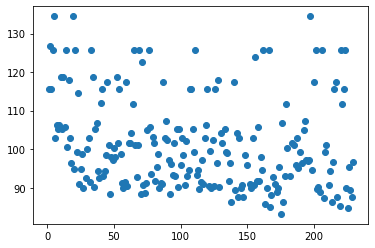

In [18]:
x = university_rankings.national_rank.values
y = university_rankings['RPP_all']
fig, ax = plt.subplots()
ax.scatter(
    x,
    y
)
#plt.plot(smoothed)
#ax.set_yscale('log')

In [19]:
import seaborn as sns

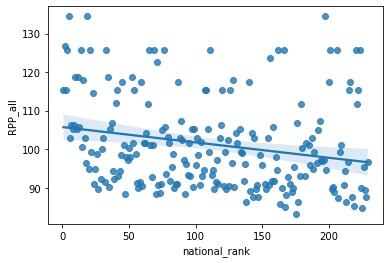

In [20]:
fig, ax = plt.subplots()
sns.regplot(x = "national_rank", y="RPP_all", data=university_rankings, ax = ax)# logx=True, #
#ax.set_xscale('log')